In [1]:
from Data_Analysis_v1 import sample

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data_allCols = pd.read_csv("survey_report_test_v1.csv")
data_necessaryColumns = data_allCols.drop(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q_DuplicateRespondent'], axis=1)

In [3]:
data = sample(data_necessaryColumns)

In [4]:
data.mainDataset.head()

,Q1,Q2,Q5,Q6,Q7,Q8,Q9,Q9#1_1,Q9#1_2,Q9#1_3,...,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q12,Q13_1,Q13_2,Q13_3,Q14
0,NaN,NaN,NaN,NaN,NaN,NaN,"1,2,3,4",1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,3.0,3.0,5.0,2.0,2.0,"1,5",1,0,0,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,3.0
2,1.0,3.0,1.0,5.0,1.0,2.0,"2,3,5",0,1,1,...,1.0,2.0,NaN,3.0,NaN,3.0,18.0,19.0,17.0,4.0
3,1.0,3.0,NaN,4.0,1.0,2.0,"2,3",0,1,1,...,2.0,1.0,NaN,NaN,NaN,4.0,18.0,19.0,17.0,NaN
4,1.0,3.0,4.0,5.0,2.0,2.0,"1,3",1,0,1,...,NaN,1.0,NaN,NaN,NaN,3.0,18.0,19.0,16.0,3.0


In [5]:
data.mainDataset.describe()

,Q1,Q2,Q5,Q6,Q7,Q8,Q9#1_1,Q9#1_2,Q9#1_3,Q9#1_4,...,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q12,Q13_1,Q13_2,Q13_3,Q14
count,54.00000,55.000000,54.000000,55.000000,55.000000,55.000000,56.000000,56.000000,56.000000,56.000000,...,30.000000,18.000000,10.000000,15.000000,12.000000,55.000000,54.000000,54.000000,54.000000,54.000000
mean,1.12963,6.381818,3.240741,4.472727,1.527273,1.527273,0.464286,0.553571,0.339286,0.196429,...,2.000000,1.666667,1.500000,2.266667,2.250000,3.309091,17.259259,17.296296,17.277778,3.518519
std,0.33905,3.268769,1.196460,1.086185,0.503857,0.503857,0.503236,0.501621,0.477752,0.400892,...,0.830455,0.594089,0.527046,1.162919,1.356801,1.016033,1.067269,1.175691,0.919735,1.023142
min,1.00000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,16.000000,16.000000,1.000000
25%,1.00000,3.000000,2.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.500000,1.000000,3.000000,17.000000,16.000000,17.000000,3.000000
50%,1.00000,6.000000,3.000000,5.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,...,2.000000,2.000000,1.500000,2.000000,2.000000,3.000000,17.000000,17.000000,17.000000,3.500000
75%,1.00000,9.000000,4.000000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,18.000000,18.000000,18.000000,4.000000
max,2.00000,12.000000,5.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,5.000000,5.000000,5.000000,20.000000,20.000000,19.000000,5.000000


In [6]:
def generateReport(inDataset, inOutputColumn, inTargetCol_values):
    dataDescriptions = []
    descriptionTitles = []
    dataDescriptions_subsets = []
    descriptionTitles_subsets = []
    for i in range(0, len(inTargetCol_values)):
        if math.isnan(inTargetCol_values[i]):
            continue
        inDataset.changeinputColumnValue_subset(inTargetCol_values[i])
        dataDescriptions.append(inDataset.data[inOutputColumn].describe())
        descriptionTitles.append(str(inTargetCol_values[i]) + " (" + inOutputColumn + ")")
        inDataset.visualize_dataset(figureID = (i+1))
        inDataset.setSubset_IQR()
        dataDescriptions_subsets.append(inDataset.subset[inOutputColumn].describe())
        descriptionTitles_subsets.append(str(inTargetCol_values[i]) + " IQR (" + inOutputColumn + ")")
    
    side_by_side_description = pd.concat(dataDescriptions, axis=1, keys=descriptionTitles)
    
    print(side_by_side_description)
    
    print("---------------------------------------------")
    
    
    
    side_by_side_description_subsets = pd.concat(dataDescriptions_subsets, axis=1, keys=descriptionTitles_subsets)
    
    print(side_by_side_description_subsets)
    print("---------------------------------------------")

In [7]:
def columnReport(inTargetCol, inOutputColumnNames):
    targetCol_values = data.mainDataset[inTargetCol].unique().tolist()
    data.inputColumnName = inTargetCol
    
    data.changeOutputColumn_main(targetCol)
    data.visualize_dataset_main()
    data.mainDataset.describe()
    
    for outputColumn in outputColumnNames:
        data.changeOutputColumn_main(outputColumn)
        generateReport(data, outputColumn, targetCol_values)

In [8]:
data.mainDataset.head()

,Q1,Q2,Q5,Q6,Q7,Q8,Q9,Q9#1_1,Q9#1_2,Q9#1_3,...,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q12,Q13_1,Q13_2,Q13_3,Q14
0,NaN,NaN,NaN,NaN,NaN,NaN,"1,2,3,4",1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,3.0,3.0,5.0,2.0,2.0,"1,5",1,0,0,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,3.0
2,1.0,3.0,1.0,5.0,1.0,2.0,"2,3,5",0,1,1,...,1.0,2.0,NaN,3.0,NaN,3.0,18.0,19.0,17.0,4.0
3,1.0,3.0,NaN,4.0,1.0,2.0,"2,3",0,1,1,...,2.0,1.0,NaN,NaN,NaN,4.0,18.0,19.0,17.0,NaN
4,1.0,3.0,4.0,5.0,2.0,2.0,"1,3",1,0,1,...,NaN,1.0,NaN,NaN,NaN,3.0,18.0,19.0,16.0,3.0


In [9]:
targetCol = "Q1"
outputColumnNames = ["Q12", "Q13_1", "Q13_2", "Q13_3", "Q14"]

In [10]:
print(f"targetCol: {targetCol}")

targetCol: Q1


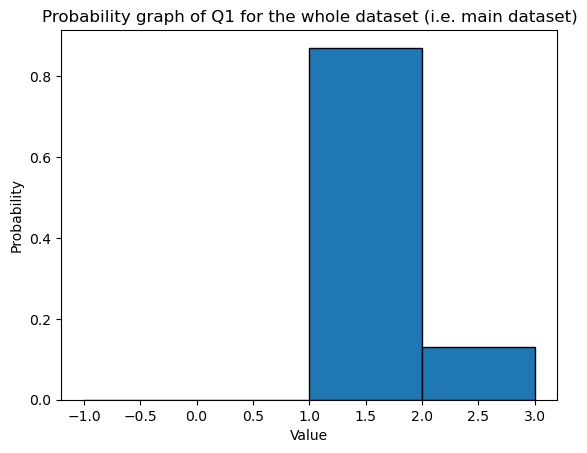

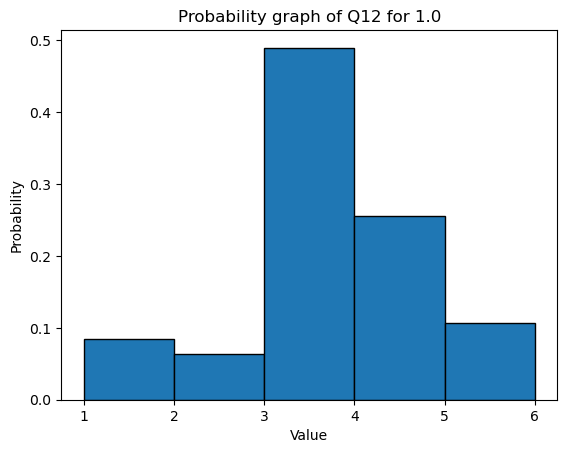

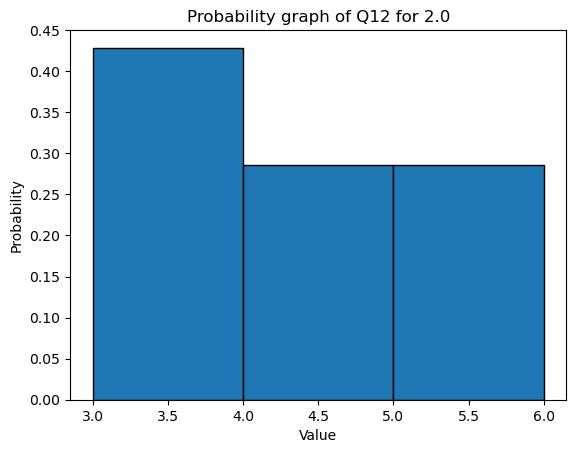

       1.0 (Q12)  2.0 (Q12)
count  47.000000   7.000000
mean    3.234043   3.857143
std     1.026026   0.899735
min     1.000000   3.000000
25%     3.000000   3.000000
50%     3.000000   4.000000
75%     4.000000   4.500000
max     5.000000   5.000000
---------------------------------------------
       1.0 IQR (Q12)  2.0 IQR (Q12)
count      23.000000       3.000000
mean        3.217391       3.666667
std         0.421741       0.577350
min         3.000000       3.000000
25%         3.000000       3.500000
50%         3.000000       4.000000
75%         3.000000       4.000000
max         4.000000       4.000000
---------------------------------------------


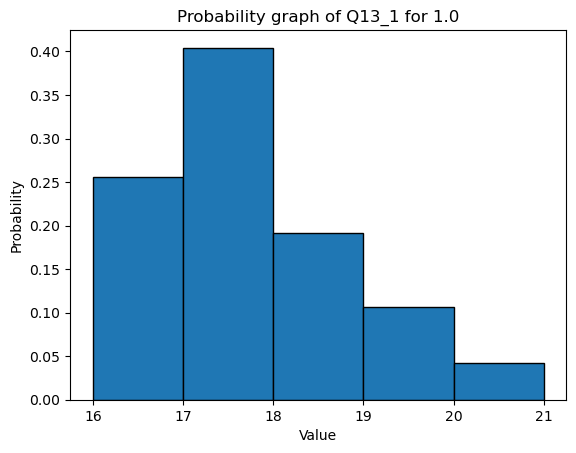

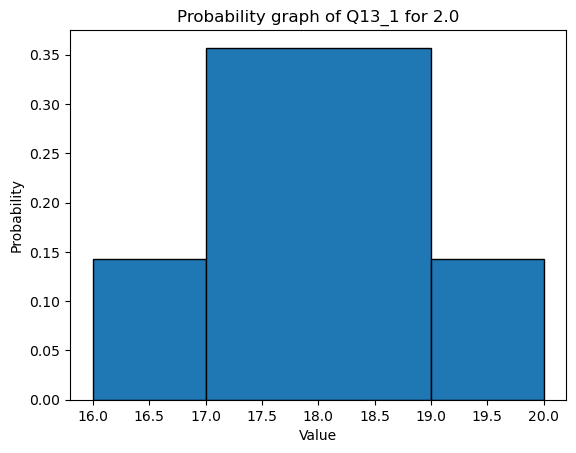

       1.0 (Q13_1)  2.0 (Q13_1)
count    47.000000     7.000000
mean     17.276596    17.142857
std       1.097470     0.899735
min      16.000000    16.000000
25%      16.500000    17.000000
50%      17.000000    17.000000
75%      18.000000    17.000000
max      20.000000    19.000000
---------------------------------------------
       1.0 IQR (Q13_1)  2.0 IQR (Q13_1)
count        23.000000              3.0
mean         17.173913             17.0
std           0.387553              0.0
min          17.000000             17.0
25%          17.000000             17.0
50%          17.000000             17.0
75%          17.000000             17.0
max          18.000000             17.0
---------------------------------------------


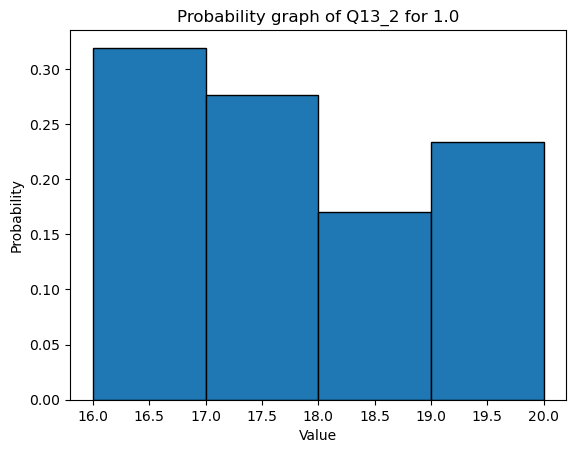

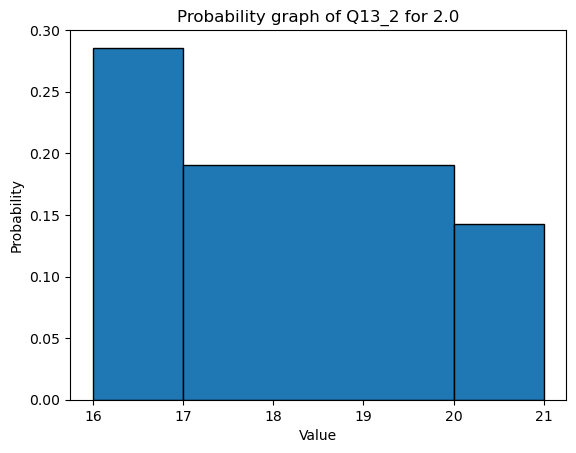

       1.0 (Q13_2)  2.0 (Q13_2)
count    47.000000     7.000000
mean     17.319149    17.142857
std       1.162949     1.345185
min      16.000000    16.000000
25%      16.000000    16.500000
50%      17.000000    17.000000
75%      18.000000    17.000000
max      19.000000    20.000000
---------------------------------------------
       1.0 IQR (Q13_2)  2.0 IQR (Q13_2)
count        23.000000              3.0
mean         17.173913             17.0
std           0.650327              0.0
min          16.000000             17.0
25%          17.000000             17.0
50%          17.000000             17.0
75%          18.000000             17.0
max          18.000000             17.0
---------------------------------------------


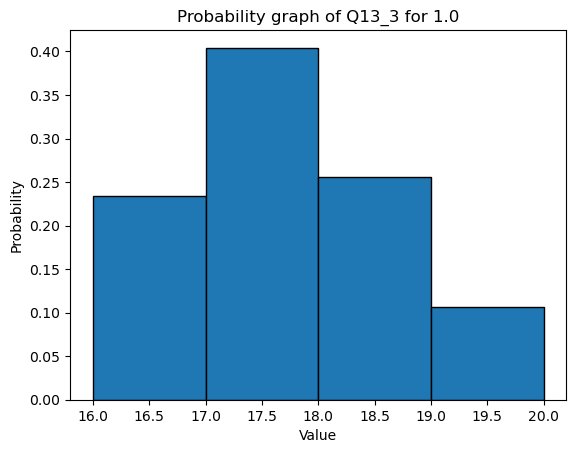

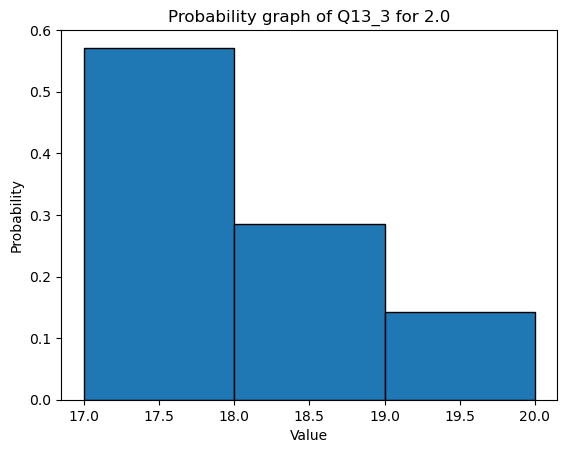

       1.0 (Q13_3)  2.0 (Q13_3)
count    47.000000     7.000000
mean     17.234043    17.571429
std       0.937452     0.786796
min      16.000000    17.000000
25%      17.000000    17.000000
50%      17.000000    17.000000
75%      18.000000    18.000000
max      19.000000    19.000000
---------------------------------------------
       1.0 IQR (Q13_3)  2.0 IQR (Q13_3)
count        23.000000         3.000000
mean         17.217391        17.333333
std           0.421741         0.577350
min          17.000000        17.000000
25%          17.000000        17.000000
50%          17.000000        17.000000
75%          17.000000        17.500000
max          18.000000        18.000000
---------------------------------------------


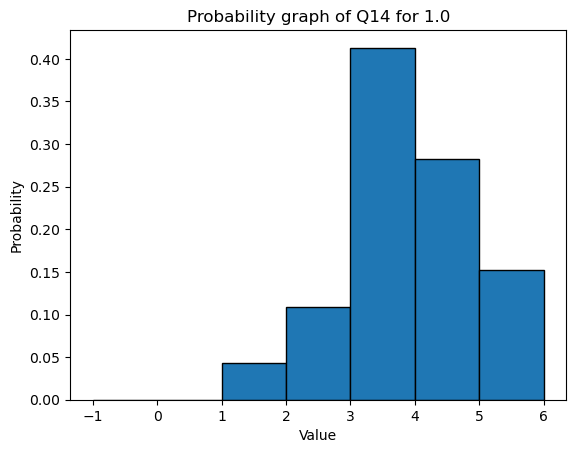

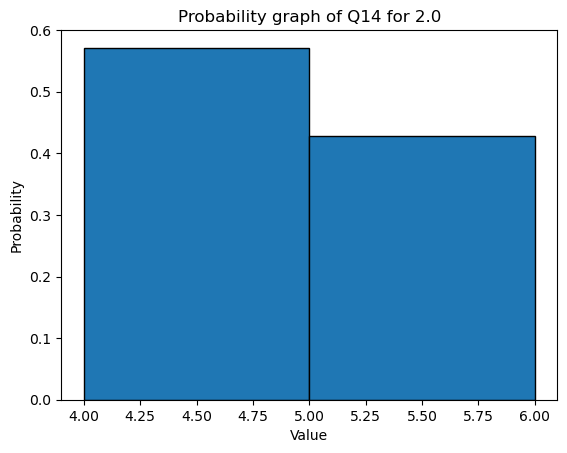

       1.0 (Q14)  2.0 (Q14)
count  46.000000   7.000000
mean    3.391304   4.428571
std     1.021508   0.534522
min     1.000000   4.000000
25%     3.000000   4.000000
50%     3.000000   4.000000
75%     4.000000   5.000000
max     5.000000   5.000000
---------------------------------------------
       1.0 IQR (Q14)  2.0 IQR (Q14)
count      23.000000       3.000000
mean        3.391304       4.333333
std         0.499011       0.577350
min         3.000000       4.000000
25%         3.000000       4.000000
50%         3.000000       4.000000
75%         4.000000       4.500000
max         4.000000       5.000000
---------------------------------------------


In [11]:
columnReport(targetCol, outputColumnNames)

In [12]:
#[Begining of report output]======================================================================


In [13]:
data.mainDataset.columns

Index(['Q1', 'Q2', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q9#1_1', 'Q9#1_2', 'Q9#1_3',
       'Q9#1_4', 'Q9#1_5', 'Q9#1_6', 'Q9_2', 'Q10#1_1', 'Q10#1_2', 'Q10#1_3',
       'Q10#1_4', 'Q10#1_5', 'Q10#1_6', 'Q11_1', 'Q11_2', 'Q11_3', 'Q11_4',
       'Q11_5', 'Q11_6', 'Q12', 'Q13_1', 'Q13_2', 'Q13_3', 'Q14'],
      dtype='object')

In [14]:
def visualize_dataset_overlap_test(inDataset, outputColumns, isProbabilityGraph = True, figureID: int = 1, columnsTitle: str = None):
    labels = []
    colors = ['blue', 'green', 'red', 'black', 'yellow', 'purple', 'orange', 'grey']
    n_bins = 30
    plt.figure(figureID)

    

    if columnsTitle == None:
        columnsTitle = ""
        for outputCoumnName in outputColumns:
            columnsTitle += outputCoumnName + ", "
    
    #[bins]-----
    unique_outputColumn = []
    for outputCoumnName in outputColumns:
        unique_outputColumn.extend(inDataset.data[outputCoumnName].unique())
    print(f'unique_outputColumn: {unique_outputColumn}')
    minVal = min(unique_outputColumn)
    print(f"replacing NaN values with {minVal}...")
    
    for i in range(0, len(unique_outputColumn)):
        if math.isnan(unique_outputColumn[i]):
            unique_outputColumn[i] = 0
    print(f'unique_outputColumn: {unique_outputColumn}')
    numUnique_outputColumn = set(unique_outputColumn)
    print(f'numUnique_outputColumn: {numUnique_outputColumn}')
    bins = numUnique_outputColumn
                    
    bins = sorted(bins)
    indexOfLastBin = len(bins) - 1
    bins = np.append(bins, bins[indexOfLastBin] +1)
    print(f'bins: {bins}')
    #[bins]-----


    index = -1
    for outputCoumnName in outputColumns:
        index = index + 1
        currLabel = outputCoumnName
        labels.append(currLabel)

        

        plt.hist(inDataset.data[outputCoumnName], bins=bins, density=isProbabilityGraph,alpha=0.6, label=currLabel, color=colors[index], edgecolor='black')
    
    
    
    if isProbabilityGraph:
        plt.title(f'Probability graph of {outputCoumnName} for {inDataset.inputColumnValue}')
        plt.ylabel('Probability')
    else:
        plt.title(f'Histogram of {outputCoumnName} for {columnsTitle}')
        plt.ylabel('Frequency')
    plt.xlabel('Value')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [15]:
Q9_Columns = ['Q9#1_1', 'Q9#1_2', 'Q9#1_3', 'Q9#1_4', 'Q9#1_5', 'Q9#1_6']

In [16]:
Q10_Columns = ['Q10#1_1', 'Q10#1_2', 'Q10#1_3', 'Q10#1_4', 'Q10#1_5', 'Q10#1_6']

In [17]:
Q11_Columns = ['Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6']

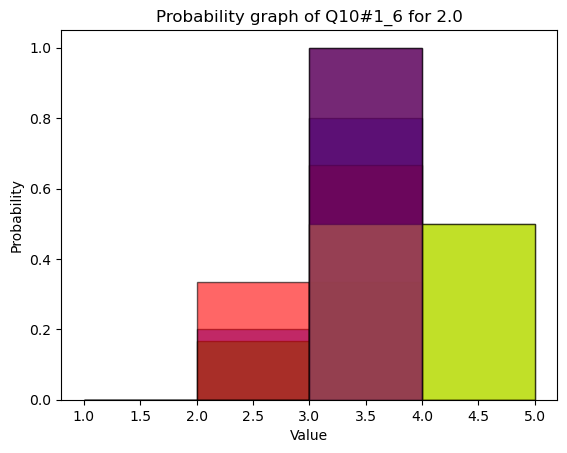

In [18]:
data.visualize_dataset_overlap(Q10_Columns, "Question 9 (Multigraph)", False)

unique_outputColumn: [1.0, 2.0, nan, 3.0, 4.0, nan, 2.0, 3.0, 1.0, nan, 2.0, nan, 2.0, nan, 4.0, 5.0, nan, 5.0]
replacing NaN values with 1.0...
unique_outputColumn: [1.0, 2.0, 0, 3.0, 4.0, 0, 2.0, 3.0, 1.0, 0, 2.0, 0, 2.0, 0, 4.0, 5.0, 0, 5.0]
numUnique_outputColumn: {0, 1.0, 2.0, 3.0, 4.0, 5.0}
bins: [0. 1. 2. 3. 4. 5. 6.]


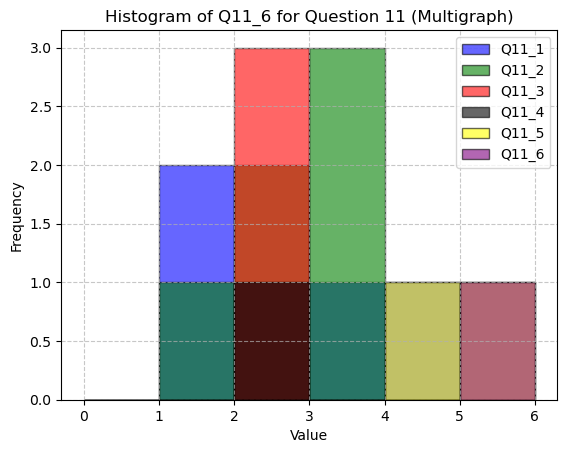

In [19]:
visualize_dataset_overlap_test(data, Q11_Columns, False, 1, "Question 11 (Multigraph)")

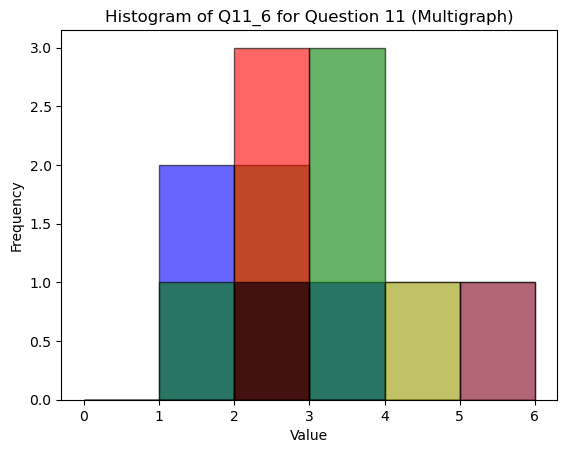

In [20]:
data.visualize_dataset_overlap(Q11_Columns, columnsTitle = "Question 11 (Multigraph)", isProbabilityGraph = False)

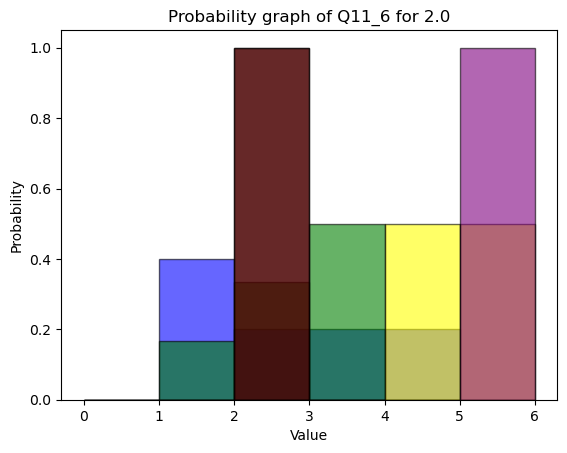

In [21]:
data.visualize_dataset_overlap(Q11_Columns, columnsTitle = "Question 11 (Multigraph)", isProbabilityGraph = True)

In [22]:
data.data.head()

,Q1,Q2,Q5,Q6,Q7,Q8,Q9,Q9#1_1,Q9#1_2,Q9#1_3,...,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q12,Q13_1,Q13_2,Q13_3,Q14
31,2.0,3.0,2.0,4.0,1.0,2.0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,3.0,16.0,17.0,19.0,4.0
32,2.0,4.0,3.0,5.0,1.0,1.0,"1,2,3",1,1,1,...,2.0,2.0,NaN,NaN,NaN,3.0,19.0,16.0,18.0,4.0
41,2.0,3.0,4.0,5.0,1.0,2.0,2,0,1,0,...,3.0,NaN,NaN,NaN,NaN,3.0,17.0,17.0,17.0,4.0
39,2.0,6.0,2.0,2.0,2.0,2.0,"2,5",0,1,0,...,3.0,NaN,NaN,4.0,NaN,4.0,17.0,20.0,17.0,4.0
47,2.0,6.0,4.0,5.0,2.0,2.0,"1,2,3",1,1,1,...,3.0,2.0,NaN,NaN,NaN,4.0,17.0,16.0,18.0,5.0


In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [24]:
x = data.data["Q8"].tolist()
y = data.data["Q9_1"].tolist()
z = data.data["Q14"].tolist()

KeyError: 'Q9_1'

In [ ]:
print(x)

In [ ]:
print(y)

In [ ]:
print(z)

In [ ]:
%matplotlib inline





fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c=z, marker='o', s=50) # Customize color, marker style, and size
ax.set_xlabel('Are you a commuter or an on-campus student?')
ax.set_ylabel('Number of reasons for going to office hours')
ax.set_zlabel('How valuable are your office hours visits when comparing their Pros and Cons? (Net value)')
ax.view_init(elev=90, azim=90)
plt.show()